# Stock Prediction Using Scikit-Learn

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('ggplot')
plt.rcParams.update({'font.size': 16})

import seaborn as sns

import pandas as pd
import numpy as np


## Load and Preprocess Data

In [2]:
df = pd.read_csv("data/AAPL.csv", parse_dates=['Date'], index_col=['Date'])
df = df.drop(columns=["Close"])

labels = df.pop("Adj Close")
features = df

In [3]:
features.head()

,Open,High,Low,Volume
Date,,,,
2018-09-20,220.240005,222.279999,219.149994,26608800
2018-09-21,220.779999,221.360001,217.289993,96246700
2018-09-24,216.820007,221.259995,216.630005,27693400
2018-09-25,219.750000,222.820007,219.699997,24554400
2018-09-26,221.000000,223.750000,219.759995,23984700


In [4]:
labels.head()

Date
2018-09-20    216.667816
2018-09-21    214.334030
2018-09-24    217.416183
2018-09-25    218.794800
2018-09-26    217.051849
Name: Adj Close, dtype: float64

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)

## Define models to use 

In [6]:
regressors = [("Linear Regression", LinearRegression()), 
              ("Random Forest", RandomForestRegressor(n_estimators=100)),
              ("AdaBoost Regressor", AdaBoostRegressor())]

In [7]:
def test_regressor(reg, X, y, name):
    """Helper function to evaluate regression models"""
    
    preds = reg.predict(X)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.plot(y, "--", label="True")
    ax.plot(y.index, preds, "-", label="Pred")
    
    ax.legend(loc='upper right')
    
    ax.set(xlabel="Date", ylabel="Price (USD)",
       title="AAPL Stock Prices Prediction using {}".format(name))
    
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
    
    plt.show()

## Evaluate and Visualize Results 

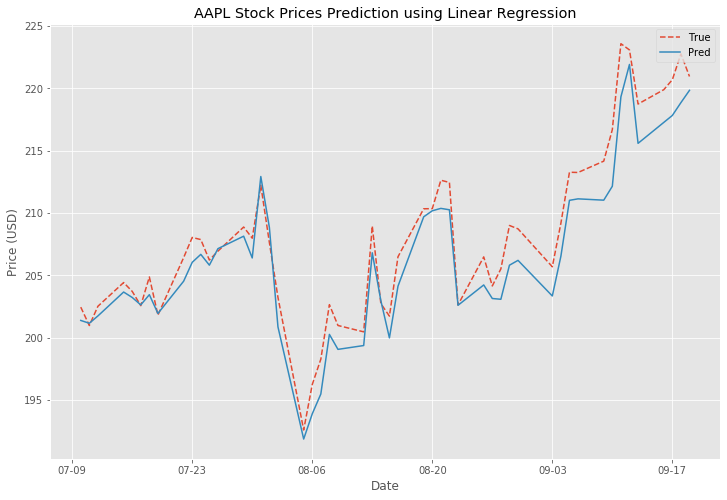

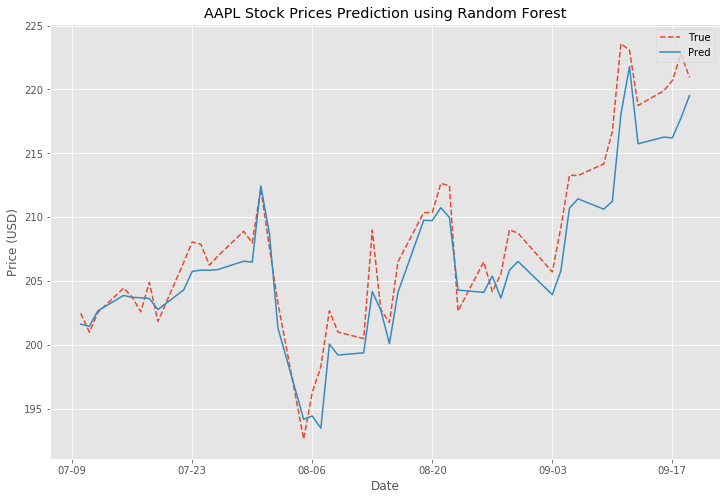

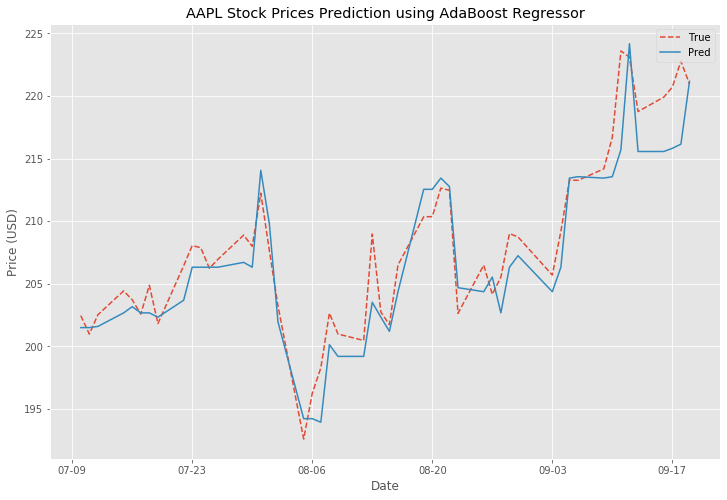

In [8]:
# loop through regressors, train and test results
for name, reg in regressors:
    reg.fit(X_train, y_train)
    test_regressor(reg, X_test, y_test, name)